In [2]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from qr_methods import generateGaussData, runQR


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def oneQRTrial(nTrain, nTest, d, alpha, sigma_sq_eps = 1):

    XTrain, YTrain, XTest, YTest, _ = generateGaussData(nTrain, nTest, d)


    ### Vanilla QR with no regularization
    beta0, beta, eta = runQR(XTrain,YTrain,alpha,0)
    cov = np.mean(YTest <= beta0 + XTest@beta)

    return cov


nTrials = 100
nTrain = 300
nTest = 2000
ds = [1,15,30,60,75,90]
alpha = 0.1

res = pd.DataFrame()
for i in tqdm(range(nTrials)):
    for d in ds:
        cov = oneQRTrial(nTrain, nTest, d, alpha)
        res = pd.concat([res,pd.DataFrame({'Dimension' : [d], 'Number of Training Points': [nTrain], 'Miscoverage': [1-cov]})])

100%|█████████████████████████████████████████████| 100/100 [01:15<00:00,  1.32it/s]


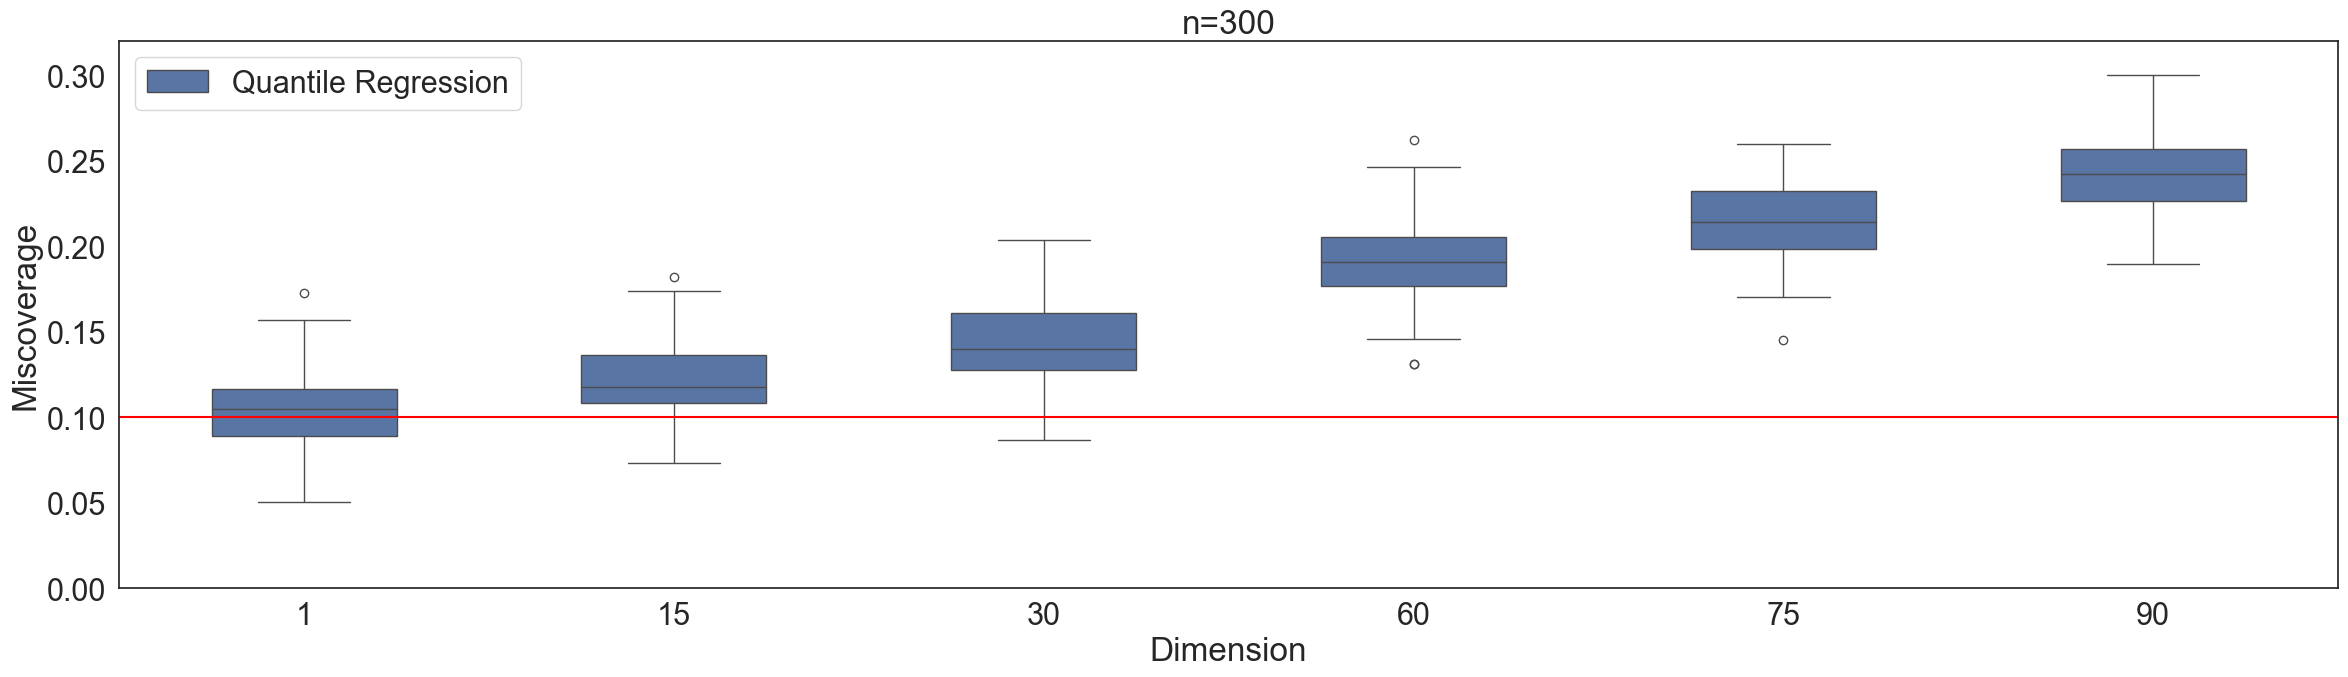

In [8]:
sns.set(rc={'figure.figsize':(24,7.3)})
sns.set(font_scale=2)
sns.set_style(style='white')

res['Method'] = 'Quantile Regression'

f1 = sns.boxplot(res,x='Dimension',y='Miscoverage', hue='Method',width=0.5)
f1.axhline(alpha, color='red')
plt.ylim(0, 0.32)
plt.legend(title="", loc='upper left')
plt.title('n=300')

plt.tight_layout()

plt.savefig('figures/QRCoverage.pdf')